In [ ]:
import cv2
import matplotlib.pyplot as plt
import os
import numpy as np

!pip -q install ultralytics
import torch
from ultralytics import YOLO

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 701.1/701.1 kB 7.7 MB/s eta 0:00:00


In [ ]:
torch.cuda.get_device_name()

'Tesla T4'

##**1.1. Import data**

In [ ]:
from google.colab import drive
drive.mount("drive/")

Mounted at drive/


In [ ]:
import zipfile

zip_ref= zipfile.ZipFile("/content/drive/MyDrive/suresh_sir_project/detection/seaships_custom/seaships_custom.zip", "r")
# zip_ref= zipfile.ZipFile("/content/drive/MyDrive/suresh_sir_project/detection/custom_dataset/yolo_custom_dataset.zip", "r")

zip_ref.extractall()

##**1.2. View samples**

In [ ]:
master_class= ["barge", "bulk_carrier", "cargo_ship", "coaster", "container_ship","fishing_vessel", "gas_carrier",
               "military_vessel", "miscellaneous", "passenger_ship", "roro_ship", "sailing_ship", "service_vessel", "tanker"]

idx2class={}
for key, value in enumerate(master_class):
  idx2class[key]= value

In [ ]:
# "/content/seaships_custom/train/images"
# "/content/yolo_custom_dataset/train/images"

def view_samples(im_dir= "/content/seaships_custom/train/images"):

    im_names= os.listdir(im_dir)
    im_names= np.random.choice(im_names, 9)
    fig, axs= plt.subplots(3, 3, figsize= (15, 15))
    bounded_ims= []

    for im_name in im_names:
        im_path= im_dir+ f"/{im_name}"
        label_path= "/content/seaships_custom/train/labels/"+ im_name.split(".")[0]+ ".txt"
        im= cv2.imread(im_path, 1)
        with open(label_path, "r") as f:
            content= f.readlines()
        f.close()
        for line in content:
            idx, xc, yc, w, h= [float(i) for i in line.split()]
            xc, yc, w, h= xc*640, yc*640, w*640, h*640
            im= cv2.rectangle(im, (int(xc-w/2), int(yc-h/2)), (int(xc+w/2), int(yc+h/2)), (0, 255, 0), 2)
            im= cv2.putText(im, f'{int(idx)}', (int(xc-w/2), int(yc-h/2)-10), cv2.FONT_HERSHEY_SIMPLEX, 1, (0, 0, 255), 2, cv2.LINE_AA)
        bounded_ims.append(im)

    count= 0
    for r in range(3):
        for c in range(3):
            im= cv2.cvtColor(bounded_ims[count], cv2.COLOR_BGR2RGB)
            axs[r][c].imshow(im)
            axs[r][c].axis("off")
            count+=1
    plt.show()

In [ ]:
view_samples()

##**1.3. YOLO v8 model**

In [ ]:
import locale
print(locale.getpreferredencoding())

def getpreferredencoding(do_setlocale = True):
    return "UTF-8"
locale.getpreferredencoding = getpreferredencoding

UTF-8


In [ ]:
from google.colab import files
response= input("Do you have a pretrained model(y/n):")

if response== "y":
  # print("upload the pretrained model:")
  # files.upload()
  num= int(input("run_"))

  PATH= f"/content/drive/MyDrive/suresh_sir_project/detection/seaships_custom/yolov8n_checkpoints/run_{num}/last.pt"
  # PATH= f"/content/drive/MyDrive/suresh_sir_project/detection/custom_dataset/model_checkpoints/run_{num}/last.pt"

else:
  PATH= "yolov8n.pt"
  num= 0

Do you have a pretrained model(y/n):y
run_3


In [ ]:
# "/content/seaships_custom/data.yaml"
# /content/yolo_custom_dataset/data.yaml

model= YOLO(PATH)

if response== "y":
  train_results= model.train(data= "/content/seaships_custom/data.yaml", epochs= 4, imgsz= 640, resume= False, project= "ship_detection")

else:
  train_results= model.train(data= "/content/seaships_custom/data.yaml", epochs= 4, imgsz= 640, resume= False, project= "ship_detection")

Ultralytics YOLOv8.1.3 🚀 Python-3.10.12 torch-2.1.0+cu121 CUDA:0 (Tesla T4, 15102MiB)
engine/trainer: task=detect, mode=train, model=/content/drive/MyDrive/suresh_sir_project/detection/seaships_custom/yolov8n_checkpoints/run_6/last.pt, data=/content/seaships_custom/data.yaml, epochs=10, time=None, patience=50, batch=16, imgsz=640, save=True, save_period=-1, cache=False, device=None, workers=8, project=ship_detection, name=train, exist_ok=False, pretrained=True, optimizer=auto, verbose=True, seed=0, deterministic=True, single_cls=False, rect=False, cos_lr=False, close_mosaic=10, resume=False, amp=True, fraction=1.0, profile=False, freeze=None, multi_scale=False, overlap_mask=True, mask_ratio=4, dropout=0.0, val=True, split=val, save_json=False, save_hybrid=False, conf=None, iou=0.7, max_det=300, half=False, dnn=False, plots=True, source=None, vid_stride=1, stream_buffer=False, visualize=False, augment=False, agnostic_nms=False, classes=None, retina_masks=False, embed=None, show=False, s

100%|██████████| 755k/755k [00:00<00:00, 16.2MB/s]



                   from  n    params  module                                       arguments                     
  0                  -1  1       464  ultralytics.nn.modules.conv.Conv             [3, 16, 3, 2]                 
  1                  -1  1      4672  ultralytics.nn.modules.conv.Conv             [16, 32, 3, 2]                
  2                  -1  1      7360  ultralytics.nn.modules.block.C2f             [32, 32, 1, True]             
  3                  -1  1     18560  ultralytics.nn.modules.conv.Conv             [32, 64, 3, 2]                
  4                  -1  2     49664  ultralytics.nn.modules.block.C2f             [64, 64, 2, True]             
  5                  -1  1     73984  ultralytics.nn.modules.conv.Conv             [64, 128, 3, 2]               
  6                  -1  2    197632  ultralytics.nn.modules.block.C2f             [128, 128, 2, True]           
  7                  -1  1    295424  ultralytics.nn.modules.conv.Conv             [128

100%|██████████| 6.23M/6.23M [00:00<00:00, 79.7MB/s]


WARNING ⚠️ NMS time limit 0.550s exceeded
AMP: checks passed ✅


train: Scanning /content/seaships_custom/train/labels... 34711 images, 4609 backgrounds, 0 corrupt: 100%|██████████| 34711/34711 [01:17<00:00, 445.15it/s]


train: New cache created: /content/seaships_custom/train/labels.cache
albumentations: Blur(p=0.01, blur_limit=(3, 7)), MedianBlur(p=0.01, blur_limit=(3, 7)), ToGray(p=0.01), CLAHE(p=0.01, clip_limit=(1, 4.0), tile_grid_size=(8, 8))


val: Scanning /content/seaships_custom/val/labels... 11571 images, 1549 backgrounds, 0 corrupt: 100%|██████████| 11571/11571 [00:14<00:00, 804.28it/s] 


val: New cache created: /content/seaships_custom/val/labels.cache
Plotting labels to ship_detection/train/labels.jpg... 
optimizer: 'optimizer=auto' found, ignoring 'lr0=0.01' and 'momentum=0.937' and determining best 'optimizer', 'lr0' and 'momentum' automatically... 
optimizer: AdamW(lr=0.000556, momentum=0.9) with parameter groups 57 weight(decay=0.0), 64 weight(decay=0.0005), 63 bias(decay=0.0)
Image sizes 640 train, 640 val
Using 2 dataloader workers
Logging results to ship_detection/train
Starting training for 10 epochs...
Closing dataloader mosaic
albumentations: Blur(p=0.01, blur_limit=(3, 7)), MedianBlur(p=0.01, blur_limit=(3, 7)), ToGray(p=0.01), CLAHE(p=0.01, clip_limit=(1, 4.0), tile_grid_size=(8, 8))

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


       1/10      2.45G     0.7394     0.5587      1.017          9        640: 100%|██████████| 2170/2170 [14:13<00:00,  2.54it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 362/362 [02:33<00:00,  2.36it/s]


                   all      11571      12255      0.818      0.784      0.834      0.675

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


       2/10      2.34G     0.7878     0.6277      1.043          5        640: 100%|██████████| 2170/2170 [14:04<00:00,  2.57it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 362/362 [02:28<00:00,  2.43it/s]


                   all      11571      12255      0.782      0.761      0.806       0.64

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


       3/10      2.36G     0.8089     0.6688      1.051          7        640: 100%|██████████| 2170/2170 [13:53<00:00,  2.60it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 362/362 [02:26<00:00,  2.47it/s]


                   all      11571      12255      0.777      0.751      0.795      0.635

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


       4/10      2.36G     0.7952     0.6524      1.044          9        640: 100%|██████████| 2170/2170 [13:52<00:00,  2.61it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 362/362 [02:26<00:00,  2.47it/s]


                   all      11571      12255      0.824      0.753       0.82      0.664

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


       5/10      2.36G     0.7817     0.6275      1.038         12        640: 100%|██████████| 2170/2170 [13:47<00:00,  2.62it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 362/362 [02:24<00:00,  2.50it/s]


                   all      11571      12255      0.811      0.805      0.834      0.684

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


       6/10      2.36G     0.7538     0.5913      1.021          5        640: 100%|██████████| 2170/2170 [13:46<00:00,  2.63it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 362/362 [02:28<00:00,  2.44it/s]


                   all      11571      12255      0.826      0.794      0.842      0.694

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


       7/10      2.36G     0.7264     0.5511      1.007          7        640: 100%|██████████| 2170/2170 [13:31<00:00,  2.67it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 362/362 [02:28<00:00,  2.45it/s]


                   all      11571      12255      0.819      0.824      0.856      0.708

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


       8/10      2.36G     0.6946     0.5169     0.9931          7        640: 100%|██████████| 2170/2170 [13:41<00:00,  2.64it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 362/362 [02:27<00:00,  2.45it/s]


                   all      11571      12255      0.843      0.816      0.861      0.717

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


       9/10      2.36G     0.6684     0.4828     0.9797          9        640: 100%|██████████| 2170/2170 [13:44<00:00,  2.63it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 362/362 [02:21<00:00,  2.55it/s]

                   all      11571      12255      0.862      0.815      0.865      0.727



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      10/10      2.36G     0.6384     0.4526     0.9674         10        640: 100%|██████████| 2170/2170 [13:18<00:00,  2.72it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 362/362 [02:19<00:00,  2.59it/s]


                   all      11571      12255      0.862      0.828       0.88      0.744

10 epochs completed in 2.710 hours.
Optimizer stripped from ship_detection/train/weights/last.pt, 6.3MB
Optimizer stripped from ship_detection/train/weights/best.pt, 6.3MB

Validating ship_detection/train/weights/best.pt...
Ultralytics YOLOv8.1.3 🚀 Python-3.10.12 torch-2.1.0+cu121 CUDA:0 (Tesla T4, 15102MiB)
Model summary (fused): 168 layers, 3008378 parameters, 0 gradients, 8.1 GFLOPs


                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 362/362 [02:27<00:00,  2.45it/s]


                   all      11571      12255      0.862      0.828       0.88      0.744
                 barge      11571        127      0.703      0.708      0.778      0.596
          bulk_carrier      11571       3779      0.962      0.973      0.991      0.861
            cargo_ship      11571       1520      0.975      0.942      0.983      0.858
               coaster      11571         32      0.769       0.75      0.861      0.756
        container_ship      11571       1213      0.978      0.983      0.992      0.893
        fishing_vessel      11571       2776       0.96      0.966      0.988      0.804
           gas_carrier      11571        269      0.911      0.918      0.945      0.853
       military_vessel      11571        317      0.863      0.842      0.915      0.784
         miscellaneous      11571        253      0.618      0.451      0.534      0.415
        passenger_ship      11571        714      0.969      0.954      0.983      0.841
             roro_shi

In [ ]:
# !yolo task=detect mode=train model=yolov8m.pt data=/content/yolo_custom_dataset/data.yaml epochs=1 imgsz=640

#**1.4. Saving model**

In [ ]:
import shutil
import pathlib

# /content/drive/MyDrive/suresh_sir_project/detection/seaships_custom/
# /content/drive/MyDrive/suresh_sir_project/detection/custom_dataset/

pathlib.Path(f"/content/drive/MyDrive/suresh_sir_project/detection/seaships_custom/yolov8n_checkpoints/run_{num+1}").mkdir(parents= True, exist_ok= True)
shutil.copy2("/content/ship_detection/train/weights/last.pt", f"/content/drive/MyDrive/suresh_sir_project/detection/seaships_custom/yolov8n_checkpoints/run_{num+1}")

'/content/drive/MyDrive/suresh_sir_project/detection/seaships_custom/yolov8n_checkpoints/run_7/last.pt'

In [ ]:
shutil.copy2("/content/ship_detection/train/weights/best.pt", f"/content/drive/MyDrive/suresh_sir_project/detection/seaships_custom/yolov8n_checkpoints/run_{num+1}")

'/content/drive/MyDrive/suresh_sir_project/detection/seaships_custom/yolov8n_checkpoints/run_7/best.pt'

In [ ]:
# from google.colab import files
# import os

# files.download("/content/ship_detection/train/weights/best.pt")

#**1.5. Testing**

##**1.5.1 Downloading data from website**

In [ ]:
import requests
import os
import cv2

os.mkdir("test_images")

def download(link, f_name):
  request= requests.get(link)
  with open("test_images/"+f_name, "wb") as file:
    file.write(request.content)
  file.close()
  im= cv2.imread("test_images/"+f_name, 1)
  im= cv2.resize(im, (640, 640))
  cv2.imwrite("test_images/"+f_name, im)

In [ ]:
l1= "https://wpassets.porttechnology.org/wp-content/uploads/2019/07/25163928/MSC_Gulsun_1280_800_84_s_c1.jpg"
l2= "https://media.fleetmon.com/cache/newsroom_article_images/msc_loreto/dfffd29f34920450dab4199b04b82c8a.png"
l3= "https://cdn1.img.sputniknews.in/img/07e7/06/15/2588847_0:118:1280:838_1920x0_80_0_0_e153a7162bc3c8d5f62fda489e779101.jpg"
l4= "https://static.theprint.in/wp-content/uploads/2020/06/navy-ship.jpg"
l5= "https://upload.wikimedia.org/wikipedia/commons/thumb/0/06/Spirit_of_America_-_Staten_Island_Ferry.jpg/1200px-Spirit_of_America_-_Staten_Island_Ferry.jpg"

download(l1, "container_ship_1.png")
download(l2, "container_ship_2.png")
download(l3, "air_craft_carrier_1.png")
download(l4, "military_ships.png")
# download(l5, "ro_ro.png")

In [ ]:
import glob

test_im_paths= glob.glob("/content/test_images/*.png")
test_im_paths

['/content/test_images/air_craft_carrier_1.png',
 '/content/test_images/container_ship_1.png',
 '/content/test_images/container_ship_2.png',
 '/content/test_images/military_ships.png']

In [ ]:
# "/content/drive/MyDrive/suresh_sir_project/detection/seaships_custom/model_checkpoints/run_5/best.pt"

model= YOLO("/content/drive/MyDrive/suresh_sir_project/detection/seaships_custom/yolov8n_checkpoints/run_5/best.pt")
results= model(test_im_paths)
# x1, y1, x2, y2= result.boxes.xyxy.squeeze().cpu().numpy()
# x1, y1, x2, y2



0: 640x640 1 military_vessel, 1: 640x640 1 tanker, 2: 640x640 1 container_ship, 3: 640x640 3 military_vessels, 21.8ms
Speed: 2.3ms preprocess, 5.5ms inference, 1.0ms postprocess per image at shape (1, 3, 640, 640)


In [ ]:
# model.predict(test_im_paths, save= False, imgsz=640, conf= 0.15, show= True)

In [ ]:
test_ims= []
for result in results:
  im= result.plot()
  test_ims.append(im[..., ::-1])

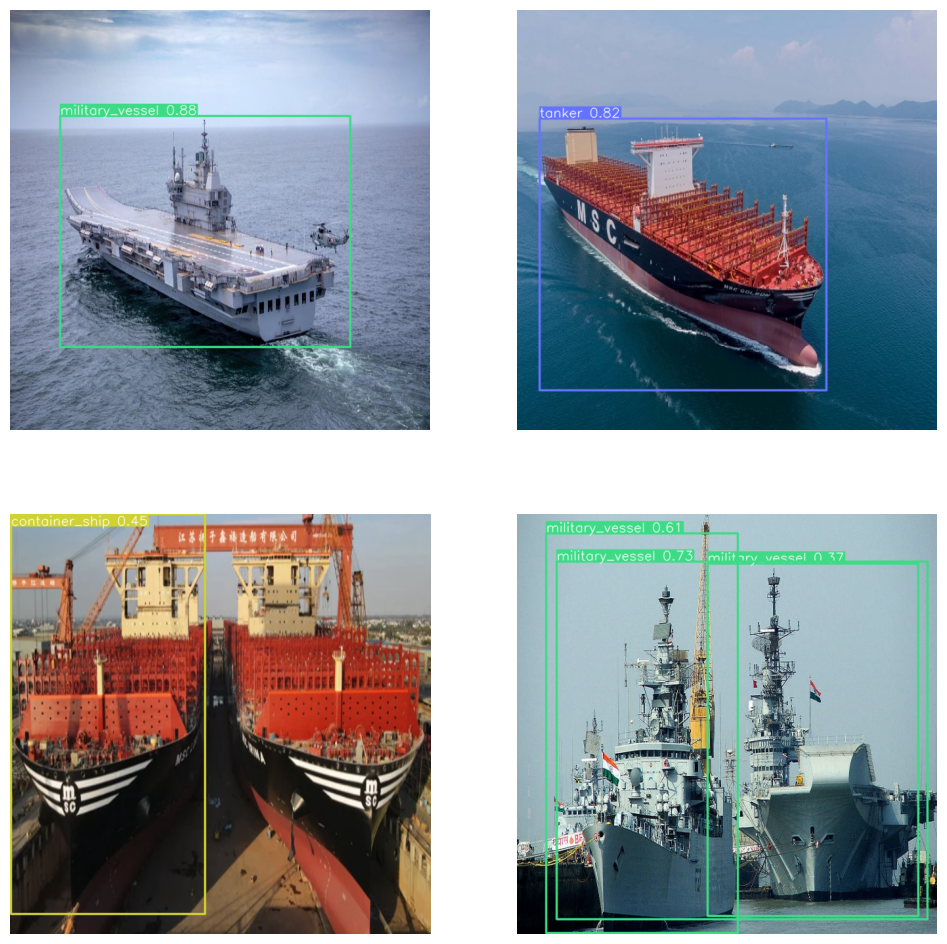

In [ ]:
import matplotlib.pyplot as plt

r, c= 2, 2
idx=0

fig, axs= plt.subplots(r, c, figsize= (12,12))
for row in range(r):
  for col in range(c):
      axs[row][col].imshow(test_ims[idx])
      axs[row][col].axis("off")
      idx+=1
plt.show()

##**1.5.2. From drive**

In [ ]:
test_im_paths= glob.glob("/content/drive/MyDrive/suresh_sir_project/detection/test_data/images/*.png")
# test_im_paths

In [ ]:
results= model(test_im_paths)


0: 640x640 1 miscellaneous, 1 service_vessel, 1: 640x640 1 sailing_ship, 2: 640x640 (no detections), 3: 640x640 1 container_ship, 4: 640x640 1 cargo_ship, 5: 640x640 1 tanker, 6: 640x640 1 roro_ship, 7: 640x640 1 sailing_ship, 1 service_vessel, 8: 640x640 1 service_vessel, 9: 640x640 1 sailing_ship, 10: 640x640 1 military_vessel, 11: 640x640 1 tanker, 12: 640x640 1 barge, 1 service_vessel, 13: 640x640 1 passenger_ship, 14: 640x640 1 tanker, 15: 640x640 1 miscellaneous, 1 service_vessel, 16: 640x640 1 barge, 1 cargo_ship, 17: 640x640 1 tanker, 18: 640x640 1 roro_ship, 19: 640x640 1 miscellaneous, 20: 640x640 1 passenger_ship, 21: 640x640 1 fishing_vessel, 22: 640x640 1 cargo_ship, 23: 640x640 1 cargo_ship, 1 container_ship, 24: 640x640 1 container_ship, 1377.2ms
Speed: 1.9ms preprocess, 55.1ms inference, 1.0ms postprocess per image at shape (1, 3, 640, 640)


In [ ]:
test_ims= []
for result in results:
  im= result.plot()
  test_ims.append(im[..., ::-1])

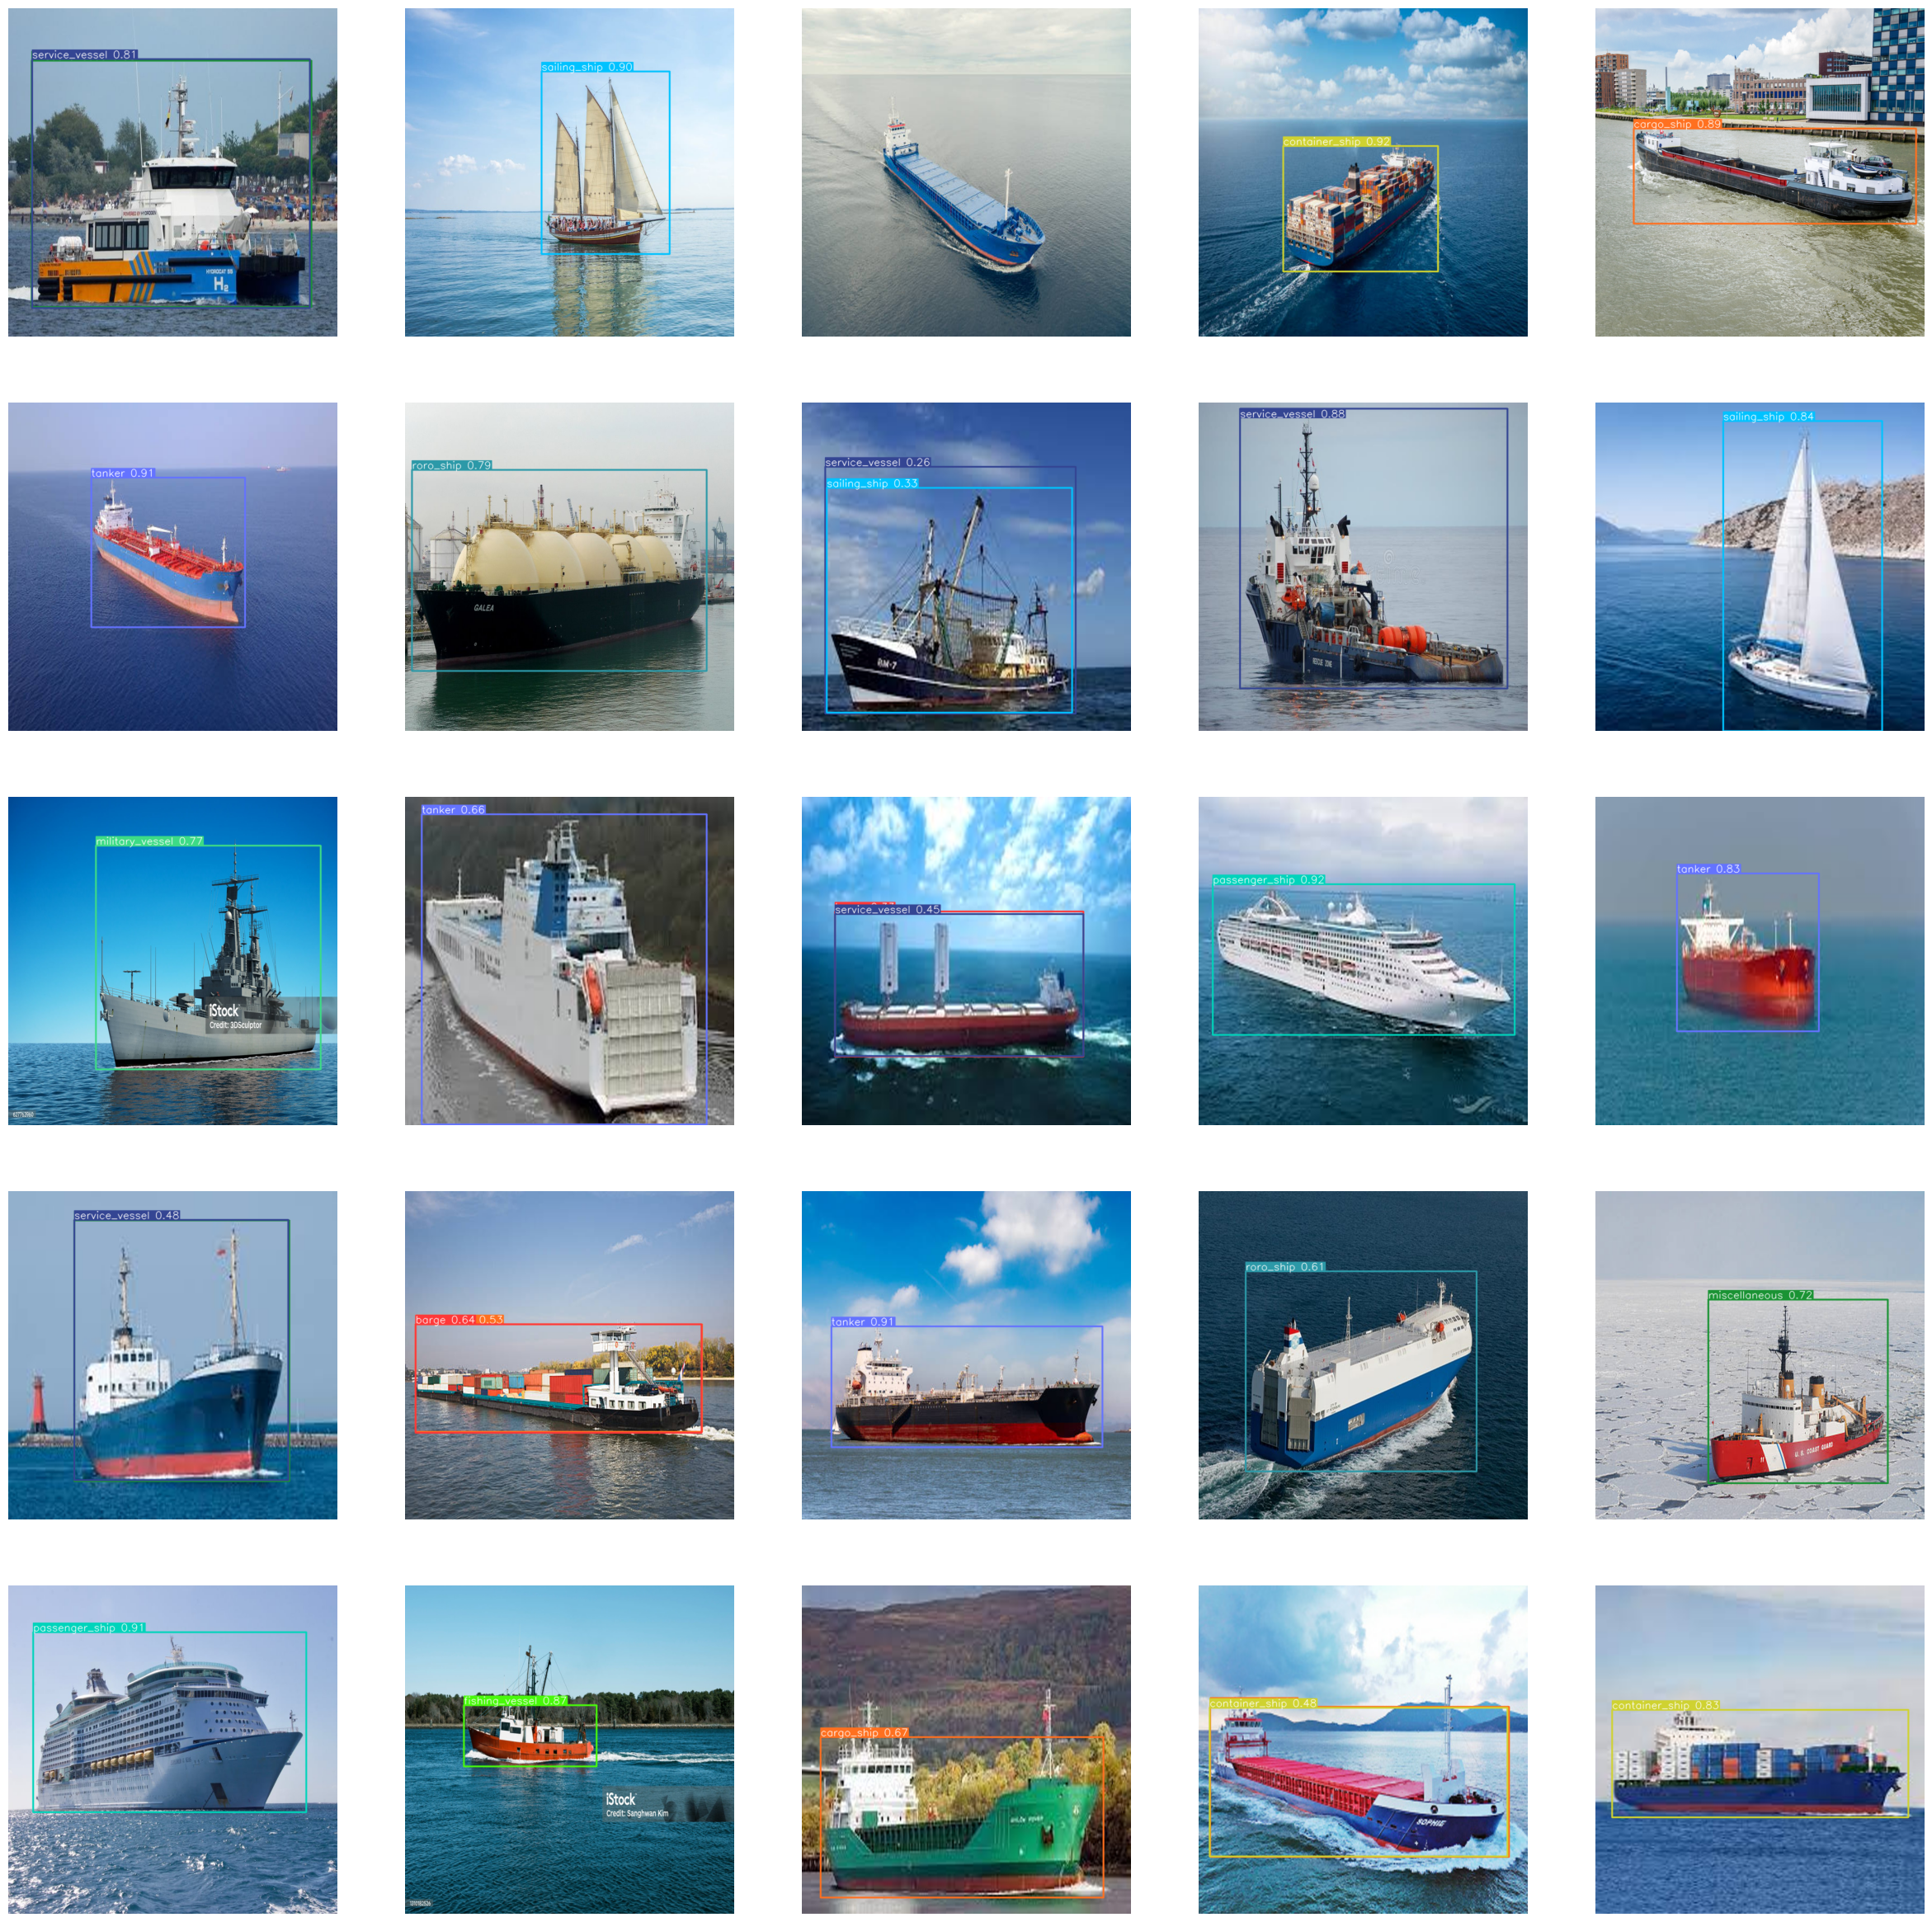

In [ ]:
r, c= 5, 5
idx=0

fig, axs= plt.subplots(r, c, figsize= (30, 30))
for row in range(r):
  for col in range(c):
      axs[row][col].imshow(test_ims[idx])
      axs[row][col].axis("off")
      idx+=1

plt.savefig("output_img.png")
plt.show()

#**1.6. Comparison of Datasets**

In [ ]:
import zipfile

zip_ref= zipfile.ZipFile("/content/drive/MyDrive/suresh_sir_project/detection/seaships_custom/seaships_custom.zip", "r")
zip_ref.extractall()

In [ ]:
import glob

metric_yolov8x_s= {}
metric_yolov8x_s["model"]= "YOLOv8X_custom+seaships"

for idx, save_path in enumerate(glob.glob("/content/drive/MyDrive/suresh_sir_project/detection/seaships_custom/yolov8x_checkpoints/*/best.pt")):
  model= YOLO(save_path)
  metric= model.val()
  metric_yolov8x_s[f"run_{idx+1}"]= round(metric.box.map50*100, 2)

Ultralytics YOLOv8.0.229 🚀 Python-3.10.12 torch-2.1.0+cu121 CUDA:0 (Tesla T4, 15102MiB)
Model summary (fused): 268 layers, 68137050 parameters, 0 gradients, 257.5 GFLOPs


100%|██████████| 755k/755k [00:00<00:00, 19.5MB/s]
val: Scanning /content/seaships_custom/val/labels... 11571 images, 1549 backgrounds, 0 corrupt: 100%|██████████| 11571/11571 [00:06<00:00, 1881.67it/s]


val: New cache created: /content/seaships_custom/val/labels.cache


                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 724/724 [12:34<00:00,  1.04s/it]


                   all      11571      12255      0.713      0.759      0.768       0.62
                 barge      11571        127      0.609      0.354      0.538      0.374
          bulk_carrier      11571       3779      0.845       0.97      0.968      0.771
            cargo_ship      11571       1520      0.889      0.928      0.956      0.767
               coaster      11571         32      0.671       0.32      0.488      0.425
        container_ship      11571       1213      0.964      0.972      0.975      0.832
        fishing_vessel      11571       2776      0.886      0.956       0.97      0.739
           gas_carrier      11571        269      0.707      0.863       0.86      0.757
       military_vessel      11571        317      0.743      0.741      0.835      0.696
         miscellaneous      11571        253       0.34       0.51      0.326      0.261
        passenger_ship      11571        714      0.908       0.94      0.968      0.771
             roro_shi

val: Scanning /content/seaships_custom/val/labels.cache... 11571 images, 1549 backgrounds, 0 corrupt: 100%|██████████| 11571/11571 [00:00<?, ?it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 724/724 [12:53<00:00,  1.07s/it]


                   all      11571      12255      0.764      0.794       0.81      0.666
                 barge      11571        127      0.682      0.541      0.627      0.443
          bulk_carrier      11571       3779      0.918      0.974      0.982      0.812
            cargo_ship      11571       1520      0.939      0.939      0.974      0.812
               coaster      11571         32       0.62      0.531      0.646      0.558
        container_ship      11571       1213      0.974      0.972      0.981       0.85
        fishing_vessel      11571       2776      0.933      0.951      0.982      0.767
           gas_carrier      11571        269      0.721      0.914      0.908      0.812
       military_vessel      11571        317      0.874      0.742      0.874      0.735
         miscellaneous      11571        253      0.405      0.451      0.369       0.29
        passenger_ship      11571        714      0.931      0.955      0.975      0.797
             roro_shi

val: Scanning /content/seaships_custom/val/labels.cache... 11571 images, 1549 backgrounds, 0 corrupt: 100%|██████████| 11571/11571 [00:00<?, ?it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 724/724 [13:01<00:00,  1.08s/it]


                   all      11571      12255      0.833      0.827      0.862      0.722
                 barge      11571        127      0.612      0.745      0.743      0.543
          bulk_carrier      11571       3779      0.952      0.976      0.988      0.851
            cargo_ship      11571       1520      0.968      0.941      0.981      0.842
               coaster      11571         32      0.813       0.75      0.848      0.755
        container_ship      11571       1213      0.981      0.979      0.992      0.877
        fishing_vessel      11571       2776       0.96      0.964      0.987      0.793
           gas_carrier      11571        269      0.846      0.918      0.936      0.835
       military_vessel      11571        317      0.888      0.785      0.889       0.77
         miscellaneous      11571        253      0.626      0.278      0.449      0.332
        passenger_ship      11571        714      0.952      0.955      0.985       0.83
             roro_shi

val: Scanning /content/seaships_custom/val/labels.cache... 11571 images, 1549 backgrounds, 0 corrupt: 100%|██████████| 11571/11571 [00:00<?, ?it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 724/724 [13:07<00:00,  1.09s/it]


                   all      11571      12255      0.858      0.836      0.875      0.743
                 barge      11571        127      0.657      0.677      0.746      0.569
          bulk_carrier      11571       3779      0.962       0.98      0.989      0.862
            cargo_ship      11571       1520      0.965      0.943      0.983      0.857
               coaster      11571         32      0.889      0.812      0.873      0.761
        container_ship      11571       1213      0.977      0.976      0.991      0.888
        fishing_vessel      11571       2776       0.96      0.965      0.986      0.807
           gas_carrier      11571        269      0.878      0.922      0.927      0.838
       military_vessel      11571        317      0.917       0.77      0.914        0.8
         miscellaneous      11571        253      0.692      0.382       0.53      0.416
        passenger_ship      11571        714       0.95      0.965      0.982      0.838
             roro_shi

val: Scanning /content/seaships_custom/val/labels.cache... 11571 images, 1549 backgrounds, 0 corrupt: 100%|██████████| 11571/11571 [00:00<?, ?it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 724/724 [13:05<00:00,  1.09s/it]


                   all      11571      12255      0.864      0.839      0.883      0.755
                 barge      11571        127      0.702      0.744      0.794      0.602
          bulk_carrier      11571       3779      0.969      0.979       0.99      0.872
            cargo_ship      11571       1520      0.972      0.955      0.985      0.867
               coaster      11571         32      0.759      0.781      0.863      0.784
        container_ship      11571       1213       0.98      0.979      0.989      0.889
        fishing_vessel      11571       2776      0.974      0.959      0.988      0.817
           gas_carrier      11571        269      0.886        0.9      0.934      0.856
       military_vessel      11571        317      0.927        0.8       0.92      0.797
         miscellaneous      11571        253       0.69      0.455      0.532      0.422
        passenger_ship      11571        714      0.952      0.965      0.984       0.86
             roro_shi

In [ ]:
import os

os.rename("/content/seaships_custom", "/content/yolo_custom_dataset")

In [ ]:
import glob

'''
Here change the dir name as we want to validate on the same dataset ie- on seaships_custom
'''
metric_yolov8x_c= {}
metric_yolov8x_c["model"]= "YOLOv8X_custom"

for idx, save_path in enumerate(glob.glob("/content/drive/MyDrive/suresh_sir_project/detection/custom_dataset/yolov8x_checkpoints/*/best.pt")):
  model= YOLO(save_path)
  metric= model.val()
  metric_yolov8x_c[f"run_{idx+1}"]= round(metric.box.map50*100, 2)

Ultralytics YOLOv8.0.229 🚀 Python-3.10.12 torch-2.1.0+cu121 CUDA:0 (Tesla T4, 15102MiB)
Model summary (fused): 268 layers, 68137050 parameters, 0 gradients, 257.5 GFLOPs


val: Scanning /content/yolo_custom_dataset/val/labels... 11571 images, 1549 backgrounds, 0 corrupt: 100%|██████████| 11571/11571 [00:16<00:00, 698.51it/s] 


val: New cache created: /content/yolo_custom_dataset/val/labels.cache


                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 724/724 [13:04<00:00,  1.08s/it]


                   all      11571      12255      0.854      0.531      0.632      0.531
                 barge      11571        127      0.526      0.622      0.626      0.496
          bulk_carrier      11571       3779      0.894     0.0638      0.197      0.123
            cargo_ship      11571       1520      0.813      0.144      0.269      0.196
               coaster      11571         32      0.866      0.844      0.894      0.806
        container_ship      11571       1213      0.952      0.215      0.368      0.305
        fishing_vessel      11571       2776      0.952     0.0721      0.256      0.139
           gas_carrier      11571        269      0.926       0.93      0.964      0.887
       military_vessel      11571        317      0.859      0.785       0.85      0.755
         miscellaneous      11571        253       0.66      0.451      0.532      0.446
        passenger_ship      11571        714      0.978       0.35      0.526      0.411
             roro_shi

val: Scanning /content/yolo_custom_dataset/val/labels.cache... 11571 images, 1549 backgrounds, 0 corrupt: 100%|██████████| 11571/11571 [00:00<?, ?it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 724/724 [13:01<00:00,  1.08s/it]


                   all      11571      12255      0.722      0.474      0.524      0.425
                 barge      11571        127      0.272      0.441       0.28      0.201
          bulk_carrier      11571       3779      0.893      0.044      0.213      0.124
            cargo_ship      11571       1520      0.925      0.122      0.228       0.17
               coaster      11571         32          1      0.599      0.699      0.623
        container_ship      11571       1213      0.868      0.212      0.376        0.3
        fishing_vessel      11571       2776      0.929     0.0569      0.292      0.149
           gas_carrier      11571        269      0.978      0.505      0.827      0.698
       military_vessel      11571        317      0.361      0.817      0.786      0.679
         miscellaneous      11571        253      0.463      0.229      0.299      0.227
        passenger_ship      11571        714      0.936      0.353      0.427      0.351
             roro_shi

val: Scanning /content/yolo_custom_dataset/val/labels.cache... 11571 images, 1549 backgrounds, 0 corrupt: 100%|██████████| 11571/11571 [00:00<?, ?it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 724/724 [13:04<00:00,  1.08s/it]


                   all      11571      12255       0.84      0.507      0.586      0.498
                 barge      11571        127      0.186      0.496       0.31      0.255
          bulk_carrier      11571       3779       0.93      0.063       0.18      0.113
            cargo_ship      11571       1520      0.952       0.13      0.257      0.187
               coaster      11571         32      0.901       0.75      0.902      0.805
        container_ship      11571       1213      0.951      0.215      0.371      0.298
        fishing_vessel      11571       2776      0.976     0.0578      0.261      0.146
           gas_carrier      11571        269      0.954      0.921      0.951      0.877
       military_vessel      11571        317      0.872      0.713      0.807      0.716
         miscellaneous      11571        253      0.612      0.364      0.414      0.336
        passenger_ship      11571        714      0.966      0.353      0.444      0.373
             roro_shi

val: Scanning /content/yolo_custom_dataset/val/labels.cache... 11571 images, 1549 backgrounds, 0 corrupt: 100%|██████████| 11571/11571 [00:00<?, ?it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 724/724 [13:04<00:00,  1.08s/it]


                   all      11571      12255      0.808      0.519      0.604      0.499
                 barge      11571        127      0.199      0.614      0.442       0.34
          bulk_carrier      11571       3779      0.937     0.0634      0.208      0.126
            cargo_ship      11571       1520       0.77      0.138      0.239      0.177
               coaster      11571         32      0.872      0.844      0.866      0.795
        container_ship      11571       1213      0.886      0.215      0.382      0.304
        fishing_vessel      11571       2776      0.973     0.0657      0.349      0.183
           gas_carrier      11571        269      0.917      0.892       0.94      0.862
       military_vessel      11571        317      0.778      0.801      0.853      0.757
         miscellaneous      11571        253       0.56      0.352      0.419      0.342
        passenger_ship      11571        714      0.963      0.362      0.514      0.398
             roro_shi

val: Scanning /content/yolo_custom_dataset/val/labels.cache... 11571 images, 1549 backgrounds, 0 corrupt: 100%|██████████| 11571/11571 [00:00<?, ?it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 724/724 [13:03<00:00,  1.08s/it]


                   all      11571      12255      0.723      0.358      0.459      0.368
                 barge      11571        127      0.312      0.157      0.199      0.153
          bulk_carrier      11571       3779       0.89     0.0366      0.166     0.0961
            cargo_ship      11571       1520      0.945     0.0888      0.206      0.153
               coaster      11571         32          1      0.108       0.47      0.395
        container_ship      11571       1213      0.945      0.195      0.372      0.296
        fishing_vessel      11571       2776      0.961     0.0176      0.224      0.112
           gas_carrier      11571        269       0.98      0.356      0.825      0.679
       military_vessel      11571        317      0.398      0.776      0.754      0.642
         miscellaneous      11571        253      0.215     0.0237      0.178      0.127
        passenger_ship      11571        714      0.924      0.326      0.413      0.336
             roro_shi

In [ ]:
import pandas as pd

results= pd.DataFrame([metric_yolov8x_s, metric_yolov8x_c])
results.T

0               1
model  YOLOv8X_custom+seaships  YOLOv8X_custom
run_1                    76.75           63.15
run_2                    81.04            52.4
run_3                    86.21           58.62
run_4                    87.52           60.39
run_5                    88.32            45.9

###**1.4.2. Conclusion**
The model trained on seaships+custom performs significantly better